# Analyzing a decade of NHL Hockey

In the last decade a lot has changed in hockey. The game has changed significantly. Not only players are stronger now but the rules have made the game different than it used to be a decade ago.

## Questions to be answered

These are the questions I am going to answer on this notebook:

1. What are the league best player and goalie
1. What are the best scorer players per team
1. What are the players that have most penalty minutes per team
1. Do home teams win more games?
1. What is the most prolific country producing NHL players?
1. Are the best players all coming from Canada?

## Acknowledgements

I cannot thank enough Jeremy Howard from [fast.ai](https://www.fast.ai/) for his incredible tools and tutorials. I borrowed a lot form his libraries.

The Data set was obtained from Kaggle's user [Martin Ellis](https://www.kaggle.com/martinellis). Thanks a ton Martin!! It is super hard to find such quality data for the NHL.



## Loading required libraries

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import squarify
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Set the precision to 2 decimals
pd.set_option("display.precision", 2)

I add this PATH variable so I don't have to type it every time to load data into pandas.

In [4]:
PATH = '../nhl-game-data/'

Loading the data I am interested

In [5]:
team_info = pd.read_csv(f'{PATH}team_info.csv', low_memory=False)
player_info = pd.read_csv(f'{PATH}player_info.csv', low_memory=False, parse_dates=["birthDate"])
game_skater_stats = pd.read_csv(f'{PATH}game_skater_stats.csv', low_memory=False)
game_goalie_stats = pd.read_csv(f'{PATH}game_goalie_stats.csv', low_memory=False)
game = pd.read_csv(f'{PATH}game.csv', low_memory=False, parse_dates=["date_time", "date_time_GMT"])

This function is borrowed from fast.ai. It lists all the data so we can see it completely in one shot (eliminating the $\dots$ dots) in Jupyter's output.

In [6]:
def display_all(df):
    '''
    INPUT - data frame - pandas dataframe with the data to display
    OUTPUT - 
            display the dataframe with 1,000 rows and columns setting
    '''
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [7]:
def display_bar_plot(x, y, color):
    '''
    INPUT - x and y axis from the data set to plot
    OUTPUT - 
            display the dataframe's bar plot
    '''
    plt.figure(figsize=(16,6))
    sns.set_color_codes("dark")
    ax = sns.barplot(x=x, y=y, color=color)
    ax.grid(False)
    #ax = sns.barplot(x=x, y=y, palette='Spectral')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

## Look at the data

In [8]:
display_all(team_info.tail().T)

,28,29,30,31,32
team_id,22,54,12,53,11
franchiseId,25,38,26,28,35
shortName,Edmonton,Vegas,Carolina,Arizona,Atlanta
teamName,Oilers,Golden Knights,Hurricanes,Coyotes,Thrashers
abbreviation,EDM,VGK,CAR,ARI,ATL
link,/api/v1/teams/22,/api/v1/teams/54,/api/v1/teams/12,/api/v1/teams/53,/api/v1/teams/11


I am going to remove all columns I really don't need for my analysis like *franchiseId* and *link* from the data frame.

In [9]:
team_info.drop(columns=['franchiseId', 'link'], inplace=True)

In [10]:
display_all(player_info.tail().T)

,2404,2405,2406,2407,2408
player_id,8478040,8480011,8480384,8480021,8477352
firstName,Austin,Klim,Alexander,Jack,Ryan
lastName,Poganski,Kostin,True,Studnicka,Fitzgerald
nationality,USA,RUS,DNK,CAN,USA
birthCity,St. Cloud,Penza,Kobenhavn,Windsor,Boca Raton
primaryPosition,RW,C,C,C,C
birthDate,1996-02-16 00:00:00,1999-05-05 00:00:00,1997-07-17 00:00:00,1999-02-18 00:00:00,1994-10-19 00:00:00
link,/api/v1/people/8478040,/api/v1/people/8480011,/api/v1/people/8480384,/api/v1/people/8480021,/api/v1/people/8477352


Again I drop the columns I don't need

In [11]:
player_info.drop(columns=['birthCity', 'link'], inplace=True)

In [12]:
display_all(game_skater_stats.tail().T)

,411573,411574,411575,411576,411577
game_id,2018030417,2018030417,2018030417,2018030417,2018030417
player_id,8475807,8475149,8475745,8478443,8478046
team_id,6,6,6,6,6
timeOnIce,501,1062,913,1006,909
assists,0,0,0,0,0
goals,0,0,0,0,0
shots,1,2,2,1,2
hits,2,0,3,1,0
powerPlayGoals,0,0,0,0,0
powerPlayAssists,0,0,0,0,0


In [13]:
display_all(game_goalie_stats.tail().T)

,24641,24642,24643,24644,24645
game_id,2018030415,2018030416,2018030416,2018030417,2018030417
player_id,8471695,8471695,8476412,8476412,8471695
team_id,6,6,19,19,6
timeOnIce,3522,3600,3487,3600,3394
assists,0,0,0,0,0
goals,0,0,0,0,0
pim,0,0,0,0,0
shots,21,29,31,33,20
saves,19,28,27,32,16
powerPlaySaves,1,12,3,3,0


In [14]:
display_all(game.tail().T)

,11429,11430,11431,11432,11433
game_id,2018030413,2018030414,2018030415,2018030416,2018030417
season,20182019,20182019,20182019,20182019,20182019
type,P,P,P,P,P
date_time,2019-06-02 00:00:00,2019-06-04 00:00:00,2019-06-07 00:00:00,2019-06-10 00:00:00,2019-06-13 00:00:00
date_time_GMT,2019-06-02 00:00:00+00:00,2019-06-04 00:00:00+00:00,2019-06-07 00:00:00+00:00,2019-06-10 00:00:00+00:00,2019-06-13 00:00:00+00:00
away_team_id,6,6,19,6,19
home_team_id,19,19,6,19,6
away_goals,7,2,2,5,4
home_goals,2,4,1,1,1
outcome,away win REG,home win REG,away win REG,away win REG,away win REG


In [15]:
game.drop(columns=['venue_link'], inplace=True)

### Describe the dataframes

I describe the dataframes to get a sense of the information contained inside.

In [16]:
display_all(team_info.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
team_id,33,NaN,NaN,NaN,19,14,1,9,17,25,54
shortName,33,33,Winnipeg,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
teamName,33,32,Coyotes,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abbreviation,33,33,STL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
display_all(player_info.describe(include='all').T)

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
player_id,2.4e+03,NaN,NaN,NaN,NaT,NaT,8.5e+06,4.7e+03,8.4e+06,8.5e+06,8.5e+06,8.5e+06,8.5e+06
firstName,2409,703,Ryan,54,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lastName,2409,2045,Smith,12,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nationality,2400,25,CAN,1146,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
primaryPosition,2409,5,D,744,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
birthDate,2409,2033,1991-01-03 00:00:00,5,1960-10-24,2000-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
display_all(game_skater_stats.describe(include='all').T)

,count,mean,std,min,25%,50%,75%,max
game_id,411578.0,2.01e+09,2.61e+06,2.01e+09,2.01e+09,2.01e+09,2.02e+09,2.02e+09
player_id,411578.0,8.47e+06,4.04e+03,8.45e+06,8.47e+06,8.47e+06,8.48e+06,8.48e+06
team_id,411578.0,1.74e+01,1.20e+01,1.00e+00,8.00e+00,1.60e+01,2.40e+01,5.40e+01
timeOnIce,411578.0,9.94e+02,2.98e+02,1.00e+00,7.98e+02,1.00e+03,1.19e+03,3.20e+03
assists,411578.0,2.59e-01,5.27e-01,0.00e+00,0.00e+00,0.00e+00,0.00e+00,5.00e+00
goals,411578.0,1.52e-01,4.04e-01,0.00e+00,0.00e+00,0.00e+00,0.00e+00,5.00e+00
shots,411578.0,1.69e+00,1.54e+00,0.00e+00,1.00e+00,1.00e+00,3.00e+00,1.50e+01
hits,411578.0,1.31e+00,1.46e+00,0.00e+00,0.00e+00,1.00e+00,2.00e+00,1.50e+01
powerPlayGoals,411578.0,3.29e-02,1.85e-01,0.00e+00,0.00e+00,0.00e+00,0.00e+00,3.00e+00
powerPlayAssists,411578.0,6.27e-02,2.59e-01,0.00e+00,0.00e+00,0.00e+00,0.00e+00,4.00e+00


In [19]:
display_all(game_goalie_stats.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
game_id,2.5e+04,NaN,NaN,NaN,2e+09,2.6e+06,2e+09,2e+09,2e+09,2e+09,2e+09
player_id,2.5e+04,NaN,NaN,NaN,8.5e+06,4.2e+03,8.5e+06,8.5e+06,8.5e+06,8.5e+06,8.5e+06
team_id,2.5e+04,NaN,NaN,NaN,17,12,1,8,16,24,54
timeOnIce,2.5e+04,NaN,NaN,NaN,3.4e+03,7.4e+02,0,3.5e+03,3.6e+03,3.6e+03,7e+03
assists,2.5e+04,NaN,NaN,NaN,0.021,0.15,0,0,0,0,2
goals,2.5e+04,NaN,NaN,NaN,0.00012,0.011,0,0,0,0,1
pim,2.5e+04,NaN,NaN,NaN,0.057,0.47,0,0,0,0,29
shots,2.5e+04,NaN,NaN,NaN,28,8.8,0,23,29,34,64
saves,2.5e+04,NaN,NaN,NaN,26,8.7,0,21,26,31,60
powerPlaySaves,2.5e+04,NaN,NaN,NaN,3.7,3,0,1,3,5,25


In [20]:
display_all(game.describe(include='all').T)

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
game_id,1.1e+04,NaN,NaN,NaN,NaN,NaN,2e+09,2.6e+06,2e+09,2e+09,2e+09,2e+09,2e+09
season,1.1e+04,NaN,NaN,NaN,NaN,NaN,2e+07,2.6e+04,2e+07,2e+07,2e+07,2e+07,2e+07
type,11434,2,R,10642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_time,11434,1923,2012-03-11 00:00:00,16,2010-10-07 00:00:00,2019-06-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_time_GMT,11434,7156,2014-10-11 23:00:00+00:00,9,2010-10-07 16:00:00+00:00,2019-06-13 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
away_team_id,1.1e+04,NaN,NaN,NaN,NaN,NaN,17,12,1,8,16,24,54
home_team_id,1.1e+04,NaN,NaN,NaN,NaN,NaN,17,12,1,8,16,24,54
away_goals,1.1e+04,NaN,NaN,NaN,NaN,NaN,2.7,1.6,0,1,3,4,10
home_goals,1.1e+04,NaN,NaN,NaN,NaN,NaN,2.9,1.7,0,2,3,4,10
outcome,11434,6,home win REG,4857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Let's check the type of each column

I run info() to spot missing data (null values), check what pandas think my data types are and correct them if necesary.

In [21]:
team_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
team_id         33 non-null int64
shortName       33 non-null object
teamName        33 non-null object
abbreviation    33 non-null object
dtypes: int64(1), object(3)
memory usage: 1.2+ KB


In [22]:
player_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2409 entries, 0 to 2408
Data columns (total 6 columns):
player_id          2409 non-null int64
firstName          2409 non-null object
lastName           2409 non-null object
nationality        2400 non-null object
primaryPosition    2409 non-null object
birthDate          2409 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 113.0+ KB


In [23]:
game_skater_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411578 entries, 0 to 411577
Data columns (total 22 columns):
game_id                 411578 non-null int64
player_id               411578 non-null int64
team_id                 411578 non-null int64
timeOnIce               411578 non-null int64
assists                 411578 non-null int64
goals                   411578 non-null int64
shots                   411578 non-null int64
hits                    411578 non-null int64
powerPlayGoals          411578 non-null int64
powerPlayAssists        411578 non-null int64
penaltyMinutes          411578 non-null int64
faceOffWins             411578 non-null int64
faceoffTaken            411578 non-null int64
takeaways               411578 non-null int64
giveaways               411578 non-null int64
shortHandedGoals        411578 non-null int64
shortHandedAssists      411578 non-null int64
blocked                 411578 non-null int64
plusMinus               411578 non-null int64
evenTimeOnIce  

In [24]:
game_goalie_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24646 entries, 0 to 24645
Data columns (total 19 columns):
game_id                       24646 non-null int64
player_id                     24646 non-null int64
team_id                       24646 non-null int64
timeOnIce                     24646 non-null int64
assists                       24646 non-null int64
goals                         24646 non-null int64
pim                           24646 non-null int64
shots                         24646 non-null int64
saves                         24646 non-null int64
powerPlaySaves                24646 non-null int64
shortHandedSaves              24646 non-null int64
evenSaves                     24646 non-null int64
shortHandedShotsAgainst       24646 non-null int64
evenShotsAgainst              24646 non-null int64
powerPlayShotsAgainst         24646 non-null int64
decision                      22868 non-null object
savePercentage                24607 non-null float64
powerPlaySavePercenta

In [25]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11434 entries, 0 to 11433
Data columns (total 15 columns):
game_id                   11434 non-null int64
season                    11434 non-null int64
type                      11434 non-null object
date_time                 11434 non-null datetime64[ns]
date_time_GMT             11434 non-null datetime64[ns, UTC]
away_team_id              11434 non-null int64
home_team_id              11434 non-null int64
away_goals                11434 non-null int64
home_goals                11434 non-null int64
outcome                   11434 non-null object
home_rink_side_start      11140 non-null object
venue                     11434 non-null object
venue_time_zone_id        11434 non-null object
venue_time_zone_offset    11434 non-null int64
venue_time_zone_tz        11434 non-null object
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), int64(7), object(6)
memory usage: 1.3+ MB


### Let's address some null values

Players file has some missing data I need to investigate.

In [26]:
player_info[player_info['nationality'].isnull()]

,player_id,firstName,lastName,nationality,primaryPosition,birthDate
1445,8480373,Josef,Korenar,NaN,G,1998-01-31
1548,8480356,Kyle,Keyser,NaN,G,1999-03-08
2009,8479138,Scott,Foster,NaN,G,1982-01-17
2026,8480718,Ben,Wexler,NaN,G,1994-12-23
2079,8479439,Jacob,MacDonald,NaN,D,1993-02-26
2107,8479016,Landon,Bow,NaN,G,1995-08-24
2383,8481481,Blake,Lizotte,NaN,C,1997-12-13
2384,8480363,Kaden,Fulcher,NaN,G,1998-09-23
2386,8480779,Niclas,Westerholm,NaN,G,1997-08-13


A quick google search and I found all these players are mainly prospects so no surprise there is missing infomation about them. 

Scott Foster was Blackhawks contracted emergency goalie. He never suited up for a game during his tenure with the team. Until that luckly night during the 2017-2018 season when all Blackhawks' goalies where injured and he was called out to dress up. He played the "longest 14 minutes of Hockey" of his live as he described it himself in one of the countless interviews he did afterwards.

I manually fixed these are this are not too many.

In [27]:
# Josef Korenar
player_info.at[1445, 'nationality'] = 'CZE'

# Kyle Keyser
player_info.at[1548, 'nationality'] = 'USA'

# Scott Foster
player_info.at[2009, 'nationality'] = 'CAN'

# Ben Wexler
player_info.at[2026, 'nationality'] = 'USA'

# Jacob MacDonald
player_info.at[2079, 'nationality'] = 'USA'

# Landon Bow
player_info.at[2107, 'nationality'] = 'CAN'

# Blake Lizotte
player_info.at[2383, 'nationality'] = 'USA'

# Kaden Fulcher
player_info.at[2384, 'nationality'] = 'CAN'

# Niclas Westerholm
player_info.at[2386, 'nationality'] = 'FIN'

## Merge data with player's, team's and game's information

Now I have to do some table joints (merge in pandas lingo) so I can have the stats and the player's name in one dataframe. Same with the goalies and team names too.

In [28]:
skater = game_skater_stats.merge(player_info, on='player_id', how='left').merge(team_info, on='team_id', how='left')

In [29]:
goalie = game_goalie_stats.merge(player_info, on='player_id', how='left').merge(team_info, on='team_id', how='left')

### Drop unnecesary columns and concatenate the player's first and last names

I concatenate the player's firs and last name into one column and drop them as I don't need them anymore moving forward.

In [30]:
skater['fullName'] = skater['firstName'].str.cat(skater['lastName'], sep=' ')

In [31]:
goalie['fullName'] = goalie['firstName'].str.cat(goalie['lastName'], sep=' ')

In [32]:
skater.drop(['firstName', 'lastName', 'player_id', 'team_id'], axis=1, inplace=True)

In [33]:
goalie.drop(['firstName', 'lastName', 'player_id', 'team_id'], axis=1, inplace=True)

In [34]:
games = skater.merge(game, on='game_id', how='left')

In [35]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411578 entries, 0 to 411577
Data columns (total 41 columns):
game_id                   411578 non-null int64
timeOnIce                 411578 non-null int64
assists                   411578 non-null int64
goals                     411578 non-null int64
shots                     411578 non-null int64
hits                      411578 non-null int64
powerPlayGoals            411578 non-null int64
powerPlayAssists          411578 non-null int64
penaltyMinutes            411578 non-null int64
faceOffWins               411578 non-null int64
faceoffTaken              411578 non-null int64
takeaways                 411578 non-null int64
giveaways                 411578 non-null int64
shortHandedGoals          411578 non-null int64
shortHandedAssists        411578 non-null int64
blocked                   411578 non-null int64
plusMinus                 411578 non-null int64
evenTimeOnIce             411578 non-null int64
shortHandedTimeOnIce     

In [36]:
skater.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411578 entries, 0 to 411577
Data columns (total 27 columns):
game_id                 411578 non-null int64
timeOnIce               411578 non-null int64
assists                 411578 non-null int64
goals                   411578 non-null int64
shots                   411578 non-null int64
hits                    411578 non-null int64
powerPlayGoals          411578 non-null int64
powerPlayAssists        411578 non-null int64
penaltyMinutes          411578 non-null int64
faceOffWins             411578 non-null int64
faceoffTaken            411578 non-null int64
takeaways               411578 non-null int64
giveaways               411578 non-null int64
shortHandedGoals        411578 non-null int64
shortHandedAssists      411578 non-null int64
blocked                 411578 non-null int64
plusMinus               411578 non-null int64
evenTimeOnIce           411578 non-null int64
shortHandedTimeOnIce    411578 non-null int64
powerPlayTimeOn

In [37]:
goalie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24646 entries, 0 to 24645
Data columns (total 24 columns):
game_id                       24646 non-null int64
timeOnIce                     24646 non-null int64
assists                       24646 non-null int64
goals                         24646 non-null int64
pim                           24646 non-null int64
shots                         24646 non-null int64
saves                         24646 non-null int64
powerPlaySaves                24646 non-null int64
shortHandedSaves              24646 non-null int64
evenSaves                     24646 non-null int64
shortHandedShotsAgainst       24646 non-null int64
evenShotsAgainst              24646 non-null int64
powerPlayShotsAgainst         24646 non-null int64
decision                      22868 non-null object
savePercentage                24607 non-null float64
powerPlaySavePercentage       22237 non-null float64
evenStrengthSavePercentage    24590 non-null float64
nationality      

In [38]:
print("Min season: {}\nMax season: {}".format(str(game['season'].min()), str(game['season'].max())))

Min season: 20102011
Max season: 20182019


## Best NHL Hockey players of the decade (2010-2019)

### What are the league's best 10 players?

As we saw before, there are some prospect players that have made it to some matchs. Later on (when I analized goalies) I saw none of the best goalies from the league in the top 10! It ended up being these prospects (like Scott Foster who playes 14 minutes and received zero goals, a 100% save percentage!) that have very few minutes but high save percentages.

To take care of this I had some alternatives:

**Eliminate all goalies with 100% save percentage**

This alternative is not fear to seasoned goalies, and players in general. Veteran goalie players enter the rink to replace the starting goalie when have already received 3-4 goals. So they deserve the good save percenatge. 

**Determine a minimum number of seasons to be considered**

Also has some issues as this arises the question of: what does make the minumum number of seasons correct? In despite of this concern I have selected this option. I have chose a minimum of 5 seasons and an average of 81 games per season (41 home ice plus 41 away games).

In [39]:
# Minimum seasons played
min_seasons_played = 5
games_per_season = 81

# Minummum number of games to be considered for the decade best player analysis
min_games = min_seasons_played * games_per_season

In [43]:
# Filter out columns I don't need right now
top_skaters = skater[['game_id','teamName','fullName','primaryPosition', 'nationality','timeOnIce','penaltyMinutes', 'goals']]\
    .groupby(['teamName','fullName', 'primaryPosition', 'nationality'], as_index=False)\
    .agg({'game_id':'count', 'goals':'sum', 'timeOnIce':'mean', 'penaltyMinutes':'sum'})\

In [44]:
top_skaters.head()

,teamName,fullName,primaryPosition,nationality,game_id,goals,timeOnIce,penaltyMinutes
0,Avalanche,A.J. Greer,LW,CAN,37,1,467.00,47
1,Avalanche,Aaron Palushaj,RW,USA,25,2,678.92,8
2,Avalanche,Adam Foote,D,CAN,47,0,1075.51,33
3,Avalanche,Alex Tanguay,LW,CAN,148,30,1038.57,68
4,Avalanche,Alexander Kerfoot,C,CAN,175,36,852.38,74


Renaming columns and doing some calculations.

In [45]:
top_skaters.columns = ['team_name','player_name', 'position', 'nationality', 'games_played','total_goals','avg_time_on_ice', 'total_penalty_minutes']

In [46]:
# Let's convert the time on ice from seconds to minutes
top_skaters['avg_time_on_ice'] = top_skaters['avg_time_on_ice'] / 60

In [47]:
# Let's compute the Goals per game (gpg) to normalize the data
top_skaters['gpg'] = top_skaters['total_goals'] / top_skaters['games_played']

# Let's see also how goals relate to time on ice (toi)
top_skaters['goals_toi'] = top_skaters['total_goals'] / (top_skaters['avg_time_on_ice'])

# Total penalty minutes per game
top_skaters['penalty_minutes_per_game'] = top_skaters['total_penalty_minutes'] / (top_skaters['games_played'])

# Now we look at the top 10 players appliying the minimum games played in the league
top_skaters[top_skaters['games_played'] > min_games].sort_values('gpg', ascending=False).head(10)

,team_name,player_name,position,nationality,games_played,total_goals,avg_time_on_ice,total_penalty_minutes,gpg,goals_toi,penalty_minutes_per_game
905,Capitals,Alex Ovechkin,LW,RUS,788,434,20.32,449,0.55,21.36,0.57
2224,Lightning,Steven Stamkos,C,CAN,655,342,19.78,438,0.52,17.29,0.67
2779,Penguins,Sidney Crosby,C,CAN,674,299,20.71,345,0.44,14.44,0.51
2713,Penguins,Evgeni Malkin,C,RUS,643,282,19.41,697,0.44,14.53,1.08
3620,Stars,Tyler Seguin,C,CAN,489,211,19.78,139,0.43,10.67,0.28
488,Blues,Vladimir Tarasenko,RW,RUS,567,244,17.74,151,0.43,13.76,0.27
1882,Islanders,John Tavares,C,CAN,611,259,20.34,297,0.42,12.73,0.49
2207,Lightning,Nikita Kucherov,RW,RUS,512,217,17.87,274,0.42,12.14,0.54
221,Blackhawks,Patrick Kane,RW,USA,748,311,20.56,268,0.42,15.12,0.36
705,Canadiens,Max Pacioretty,LW,USA,578,230,18.49,327,0.40,12.44,0.57


In [48]:
top_skaters = top_skaters[top_skaters['games_played'] > min_games]

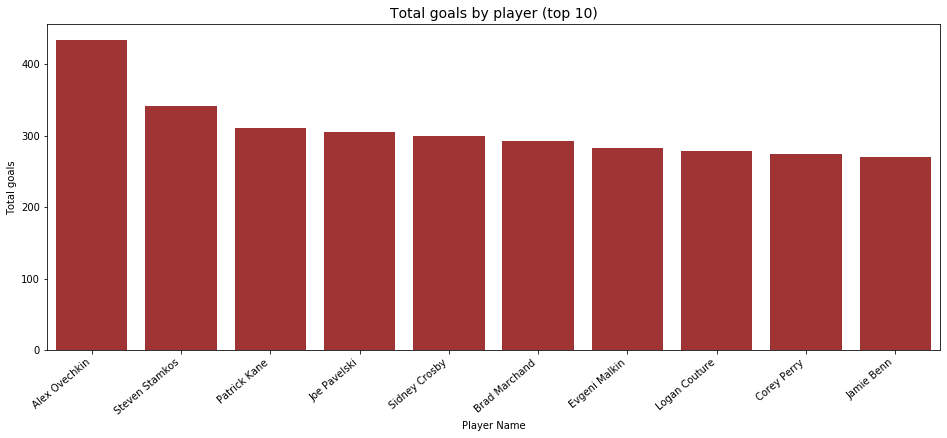

In [49]:
x = top_skaters.sort_values('total_goals', ascending=False).head(10)['player_name']
y = top_skaters.sort_values('total_goals', ascending=False).head(10)['total_goals']
display_bar_plot(x, y, color='firebrick')
plt.xlabel('Player Name')
plt.ylabel('Total goals')
plt.title('Total goals by player (top 10)', fontsize=14)
plt.show()

In [50]:
top_skaters.sort_values('total_goals', ascending=False).head(10)[['team_name','player_name', 'position', 'games_played','total_goals']]

,team_name,player_name,position,games_played,total_goals
905,Capitals,Alex Ovechkin,LW,788,434
2224,Lightning,Steven Stamkos,C,655,342
221,Blackhawks,Patrick Kane,RW,748,311
3456,Sharks,Joe Pavelski,C,782,305
2779,Penguins,Sidney Crosby,C,674,299
504,Bruins,Brad Marchand,LW,769,292
2713,Penguins,Evgeni Malkin,C,643,282
3467,Sharks,Logan Couture,C,739,279
1323,Ducks,Corey Perry,RW,690,274
3553,Stars,Jamie Benn,LW,695,270


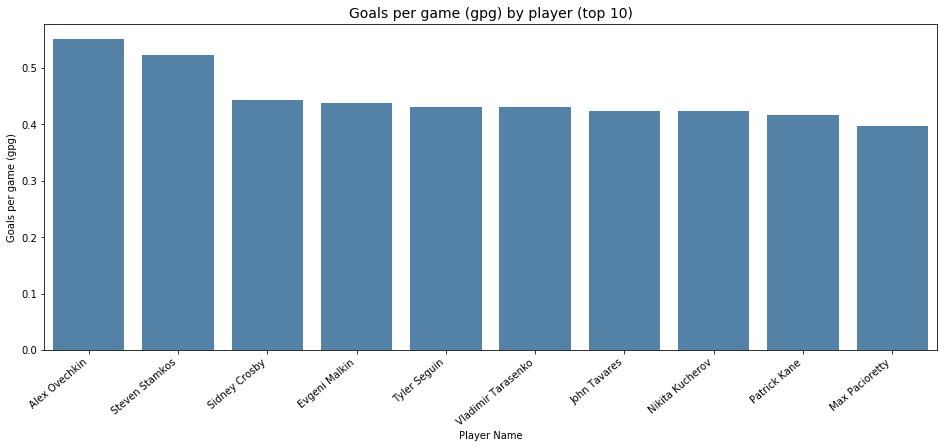

In [51]:
x = top_skaters.sort_values('gpg', ascending=False).head(10)['player_name']
y = top_skaters.sort_values('gpg', ascending=False).head(10)['gpg']
display_bar_plot(x, y, color='steelblue')
plt.xlabel('Player Name')
plt.ylabel('Goals per game (gpg)')
plt.title('Goals per game (gpg) by player (top 10)', fontsize=14)
plt.show()

Not surprisingly the ya re almost all Capitans of their respective teams!

In [52]:
top_skaters.sort_values('gpg', ascending=False).head(10)[['team_name','player_name', 'position', 'games_played','gpg']]

,team_name,player_name,position,games_played,gpg
905,Capitals,Alex Ovechkin,LW,788,0.55
2224,Lightning,Steven Stamkos,C,655,0.52
2779,Penguins,Sidney Crosby,C,674,0.44
2713,Penguins,Evgeni Malkin,C,643,0.44
3620,Stars,Tyler Seguin,C,489,0.43
488,Blues,Vladimir Tarasenko,RW,567,0.43
1882,Islanders,John Tavares,C,611,0.42
2207,Lightning,Nikita Kucherov,RW,512,0.42
221,Blackhawks,Patrick Kane,RW,748,0.42
705,Canadiens,Max Pacioretty,LW,578,0.40


Now let's look at the goals per player but normalized by minutes played (goals_toi).

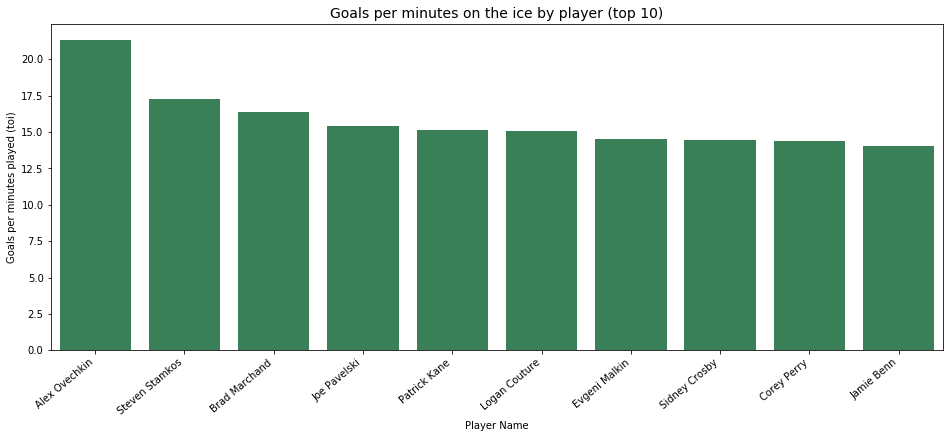

In [53]:
x = top_skaters.sort_values('goals_toi', ascending=False).head(10)['player_name']
y = top_skaters.sort_values('goals_toi', ascending=False).head(10)['goals_toi']
display_bar_plot(x, y, color='seagreen')
plt.xlabel('Player Name')
plt.ylabel('Goals per minutes played (toi)')
plt.title('Goals per minutes on the ice by player (top 10)', fontsize=14)
plt.show()

We see some movement of players on the bottom of the list but Alex Ovechkin stills remain on the first place.

In [54]:
top_skaters.sort_values('goals_toi', ascending=False).head(10)[['team_name','player_name', 'position', 'games_played','goals_toi']]

,team_name,player_name,position,games_played,goals_toi
905,Capitals,Alex Ovechkin,LW,788,21.36
2224,Lightning,Steven Stamkos,C,655,17.29
504,Bruins,Brad Marchand,LW,769,16.36
3456,Sharks,Joe Pavelski,C,782,15.42
221,Blackhawks,Patrick Kane,RW,748,15.12
3467,Sharks,Logan Couture,C,739,15.07
2713,Penguins,Evgeni Malkin,C,643,14.53
2779,Penguins,Sidney Crosby,C,674,14.44
1323,Ducks,Corey Perry,RW,690,14.36
3553,Stars,Jamie Benn,LW,695,14.03


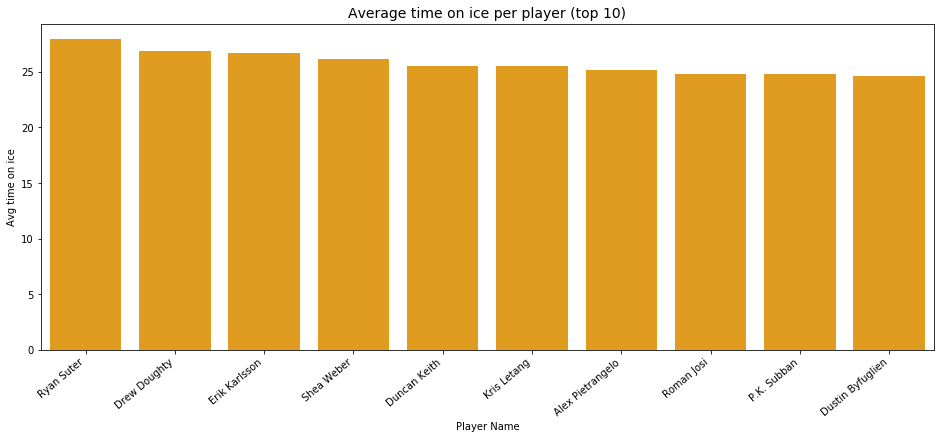

In [55]:
x = top_skaters.sort_values('avg_time_on_ice', ascending=False).head(10)['player_name']
y = top_skaters.sort_values('avg_time_on_ice', ascending=False).head(10)['avg_time_on_ice']
display_bar_plot(x, y, color='orange')
plt.xlabel('Player Name')
plt.ylabel('Avg time on ice')
plt.title('Average time on ice per player (top 10)', fontsize=14)
plt.show()

In [56]:
top_skaters.sort_values('avg_time_on_ice', ascending=False).head(10)[['team_name','player_name', 'position', 'games_played','avg_time_on_ice']]

,team_name,player_name,position,games_played,avg_time_on_ice
3770,Wild,Ryan Suter,D,570,27.93
2067,Kings,Drew Doughty,D,767,26.85
3337,Senators,Erik Karlsson,D,609,26.64
2908,Predators,Shea Weber,D,481,26.14
171,Blackhawks,Duncan Keith,D,760,25.55
2738,Penguins,Kris Letang,D,610,25.52
390,Blues,Alex Pietrangelo,D,754,25.14
2896,Predators,Roman Josi,D,634,24.80
725,Canadiens,P.K. Subban,D,473,24.79
1974,Jets,Dustin Byfuglien,D,555,24.58


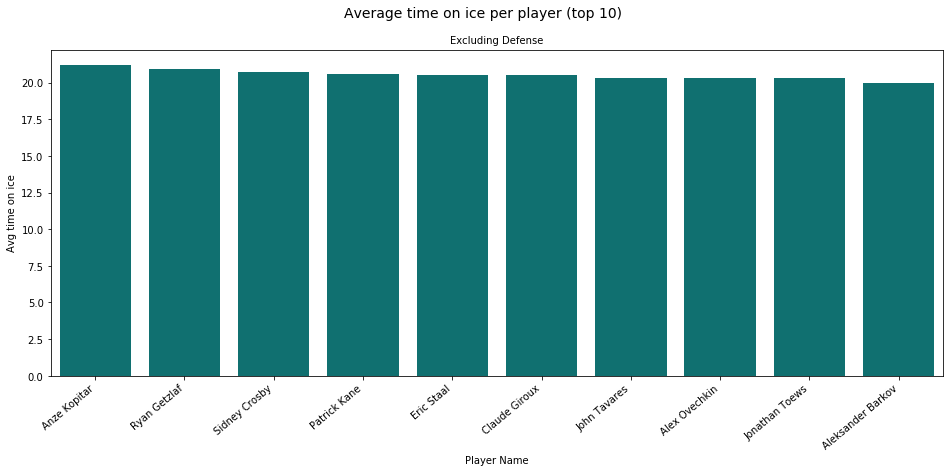

In [57]:
x = top_skaters[top_skaters['position'] != 'D'].sort_values('avg_time_on_ice', ascending=False).head(10)['player_name']
y = top_skaters[top_skaters['position'] != 'D'].sort_values('avg_time_on_ice', ascending=False).head(10)['avg_time_on_ice']
display_bar_plot(x, y, color='teal')
plt.xlabel('Player Name')
plt.ylabel('Avg time on ice')
plt.suptitle('Average time on ice per player (top 10)', fontsize=14)
plt.title('Excluding Defense', fontsize=10)
plt.show()

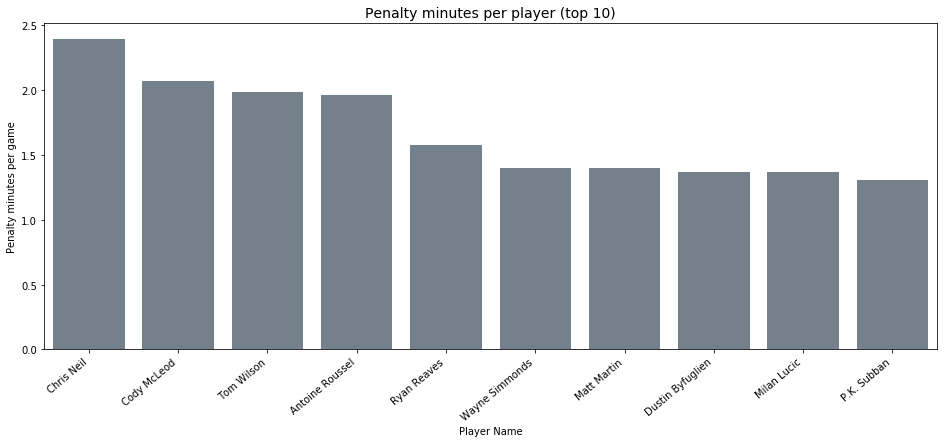

In [58]:
x = top_skaters.sort_values('penalty_minutes_per_game', ascending=False).head(10)['player_name']
y = top_skaters.sort_values('penalty_minutes_per_game', ascending=False).head(10)['penalty_minutes_per_game']
display_bar_plot(x, y, color='slategray')
plt.xlabel('Player Name')
plt.ylabel('Penalty minutes per game')
plt.title('Penalty minutes per player (top 10)', fontsize=14)
plt.show()

In [59]:
top_skaters.sort_values('penalty_minutes_per_game', ascending=False).head(10)[['team_name','player_name', 'position', 'games_played','penalty_minutes_per_game']]

,team_name,player_name,position,games_played,penalty_minutes_per_game
3305,Senators,Chris Neil,RW,468,2.40
27,Avalanche,Cody McLeod,LW,464,2.07
998,Capitals,Tom Wilson,RW,523,1.99
3518,Stars,Antoine Roussel,LW,432,1.97
471,Blues,Ryan Reaves,RW,455,1.58
1678,Flyers,Wayne Simmonds,RW,614,1.40
1906,Islanders,Matt Martin,LW,532,1.40
1974,Jets,Dustin Byfuglien,D,555,1.37
580,Bruins,Milan Lucic,LW,433,1.37
725,Canadiens,P.K. Subban,D,473,1.31


### What are the league's best 10 goalies?

In [60]:
# I drop all columns that I don't need in my analysis for now
top_goalies = goalie[['game_id','teamName','fullName','timeOnIce','savePercentage', 'shortHandedSaves']]\
    .groupby(['teamName','fullName'], as_index=False)\
    .agg({'game_id':'count', 'savePercentage':'mean', 'timeOnIce':'mean', 'shortHandedSaves':'mean'})\

In [61]:
# Rename columns
top_goalies.columns = ['team_name','player_name','games_played','avg_save_percentage','avg_time_on_ice', 'avg_short_handed_saves']

In [62]:
# Let's convert the time on ice from seconds to minutes
top_goalies['avg_time_on_ice'] = top_goalies['avg_time_on_ice'] / 60

In [63]:
top_goalies.head()

,team_name,player_name,games_played,avg_save_percentage,avg_time_on_ice,avg_short_handed_saves
0,Avalanche,Andrew Hammond,4,94.55,48.96,1.00
1,Avalanche,Brian Elliott,12,88.61,57.51,0.58
2,Avalanche,Calvin Pickard,86,90.63,54.66,0.65
3,Avalanche,Craig Anderson,33,88.65,54.86,0.61
4,Avalanche,Jean-Sebastien Giguere,72,91.32,54.71,0.50


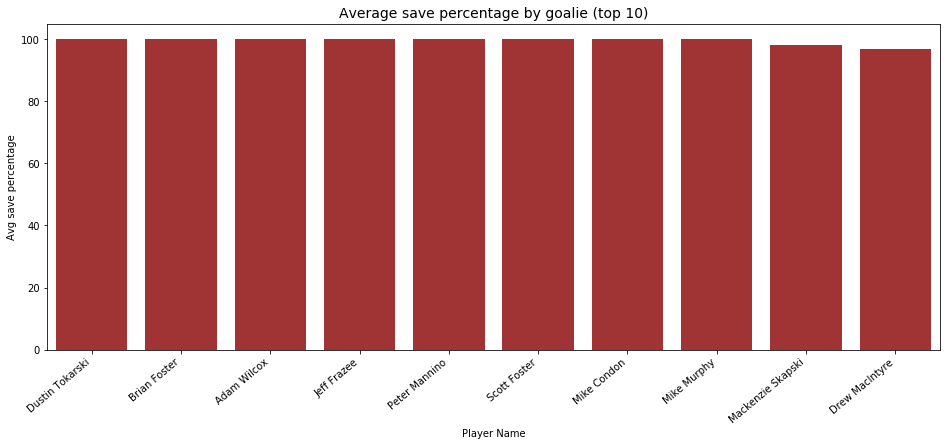

In [64]:
x = top_goalies.sort_values('avg_save_percentage', ascending=False).head(10)['player_name']
y = top_goalies.sort_values('avg_save_percentage', ascending=False).head(10)['avg_save_percentage']
display_bar_plot(x, y, color='firebrick')
plt.xlabel('Player Name')
plt.ylabel('Avg save percentage')
plt.title('Average save percentage by goalie (top 10)', fontsize=14)
plt.show()

What happened here? None of this names resonate to the ones we are so used to see playing. As I stated earlier, these are all emergency goalies and played some minutes here and there. So I fix thsi adding a minimum of season as before:

In [65]:
top_goalies = top_goalies[top_goalies['games_played'] > min_games]

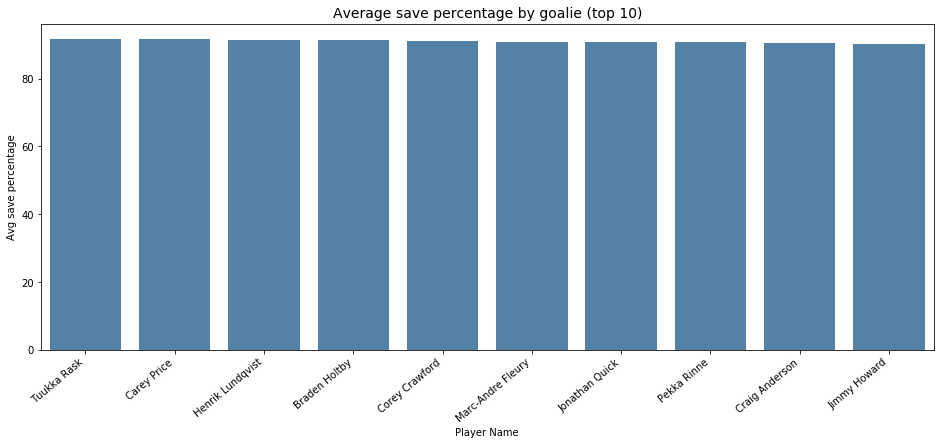

In [66]:
x = top_goalies.sort_values('avg_save_percentage', ascending=False).head(10)['player_name']
y = top_goalies.sort_values('avg_save_percentage', ascending=False).head(10)['avg_save_percentage']
display_bar_plot(x, y, color='steelblue')
plt.xlabel('Player Name')
plt.ylabel('Avg save percentage')
plt.title('Average save percentage by goalie (top 10)', fontsize=14)
plt.show()

It is very thaugh to be a goalie! Competence is huge! The variation between the first goalie (Tuukka Rask) and the second (Carey Price) is just 0.06%.

In [67]:
top_goalies.sort_values('avg_save_percentage', ascending=False).head(10)[['team_name','player_name','games_played','avg_save_percentage']]

,team_name,player_name,games_played,avg_save_percentage
61,Bruins,Tuukka Rask,521,91.56
67,Canadiens,Carey Price,531,91.50
314,Rangers,Henrik Lundqvist,617,91.32
82,Capitals,Braden Holtby,509,91.23
20,Blackhawks,Corey Crawford,526,91.07
294,Penguins,Marc-Andre Fleury,442,90.81
225,Kings,Jonathan Quick,562,90.81
308,Predators,Pekka Rinne,593,90.78
352,Senators,Craig Anderson,441,90.58
321,Red Wings,Jimmy Howard,480,90.29


Let's look what goalie played the most number of games in average.

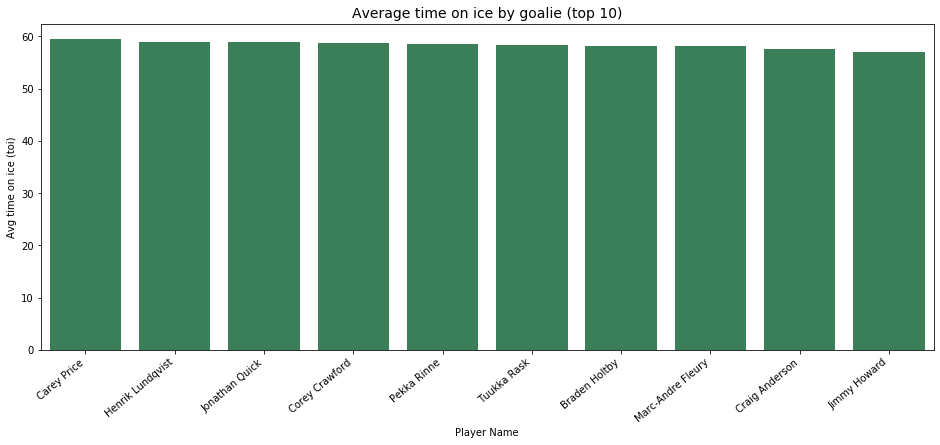

In [68]:
x = top_goalies.sort_values('avg_time_on_ice', ascending=False).head(10)['player_name']
y = top_goalies.sort_values('avg_time_on_ice', ascending=False).head(10)['avg_time_on_ice']
display_bar_plot(x, y, color='seagreen')
plt.xlabel('Player Name')
plt.ylabel('Avg time on ice (toi)')
plt.title('Average time on ice by goalie (top 10)', fontsize=14)
plt.show()

In [69]:
top_goalies.sort_values('avg_time_on_ice', ascending=False).head(10)[['team_name','player_name','games_played','avg_time_on_ice']]

,team_name,player_name,games_played,avg_time_on_ice
67,Canadiens,Carey Price,531,59.42
314,Rangers,Henrik Lundqvist,617,58.92
225,Kings,Jonathan Quick,562,58.88
20,Blackhawks,Corey Crawford,526,58.75
308,Predators,Pekka Rinne,593,58.56
61,Bruins,Tuukka Rask,521,58.29
82,Capitals,Braden Holtby,509,58.18
294,Penguins,Marc-Andre Fleury,442,58.13
352,Senators,Craig Anderson,441,57.63
321,Red Wings,Jimmy Howard,480,56.94


And as we did with the players let's see the save percentage taking into account the number of minutes played:

In [70]:
# Let's see also how avg_save_percentage relate to time on ice (toi)
top_goalies['avg_save_percentage_by_toi'] = top_goalies['avg_save_percentage'] / (top_goalies['avg_time_on_ice'])

# Now we look at the top 10 players
top_goalies.sort_values('avg_save_percentage', ascending=False).head(10)

,team_name,player_name,games_played,avg_save_percentage,avg_time_on_ice,avg_short_handed_saves,avg_save_percentage_by_toi
61,Bruins,Tuukka Rask,521,91.56,58.29,0.69,1.57
67,Canadiens,Carey Price,531,91.50,59.42,0.82,1.54
314,Rangers,Henrik Lundqvist,617,91.32,58.92,0.73,1.55
82,Capitals,Braden Holtby,509,91.23,58.18,0.73,1.57
20,Blackhawks,Corey Crawford,526,91.07,58.75,0.58,1.55
294,Penguins,Marc-Andre Fleury,442,90.81,58.13,0.68,1.56
225,Kings,Jonathan Quick,562,90.81,58.88,0.63,1.54
308,Predators,Pekka Rinne,593,90.78,58.56,0.57,1.55
352,Senators,Craig Anderson,441,90.58,57.63,0.78,1.57
321,Red Wings,Jimmy Howard,480,90.29,56.94,0.68,1.59


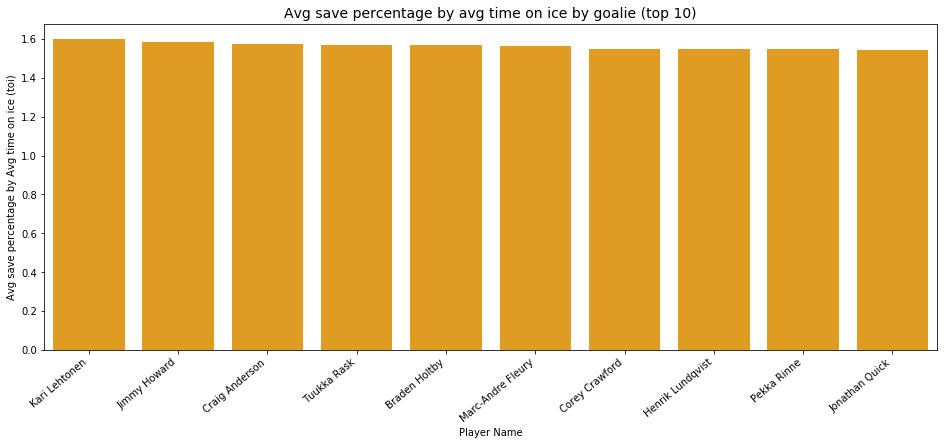

In [71]:
x = top_goalies.sort_values('avg_save_percentage_by_toi', ascending=False).head(10)['player_name']
y = top_goalies.sort_values('avg_save_percentage_by_toi', ascending=False).head(10)['avg_save_percentage_by_toi']
display_bar_plot(x, y, color='orange')
plt.xlabel('Player Name')
plt.ylabel('Avg save percentage by Avg time on ice (toi)')
plt.title('Avg save percentage by avg time on ice by goalie (top 10)', fontsize=14)
plt.show()

In [72]:
top_goalies.sort_values('avg_save_percentage_by_toi', ascending=False).head(10)[['team_name','player_name','games_played','avg_save_percentage_by_toi']]

,team_name,player_name,games_played,avg_save_percentage_by_toi
382,Stars,Kari Lehtonen,450,1.60
321,Red Wings,Jimmy Howard,480,1.59
352,Senators,Craig Anderson,441,1.57
61,Bruins,Tuukka Rask,521,1.57
82,Capitals,Braden Holtby,509,1.57
294,Penguins,Marc-Andre Fleury,442,1.56
20,Blackhawks,Corey Crawford,526,1.55
314,Rangers,Henrik Lundqvist,617,1.55
308,Predators,Pekka Rinne,593,1.55
225,Kings,Jonathan Quick,562,1.54


## What are the best scorers per team?

In [73]:
skater_reindexed = top_skaters[['total_goals', 'team_name', 'player_name']].groupby(['team_name', 'player_name']).agg({'total_goals':'sum'})\
                                         .sort_values(by=['team_name', 'total_goals'], ascending=[True, False])\
                                         .reset_index(drop=False)

In [74]:
top_3_per_team = skater_reindexed.groupby(['team_name']).head(3)

In [75]:
indice = top_3_per_team['team_name'] + ' - ' + top_3_per_team['player_name']

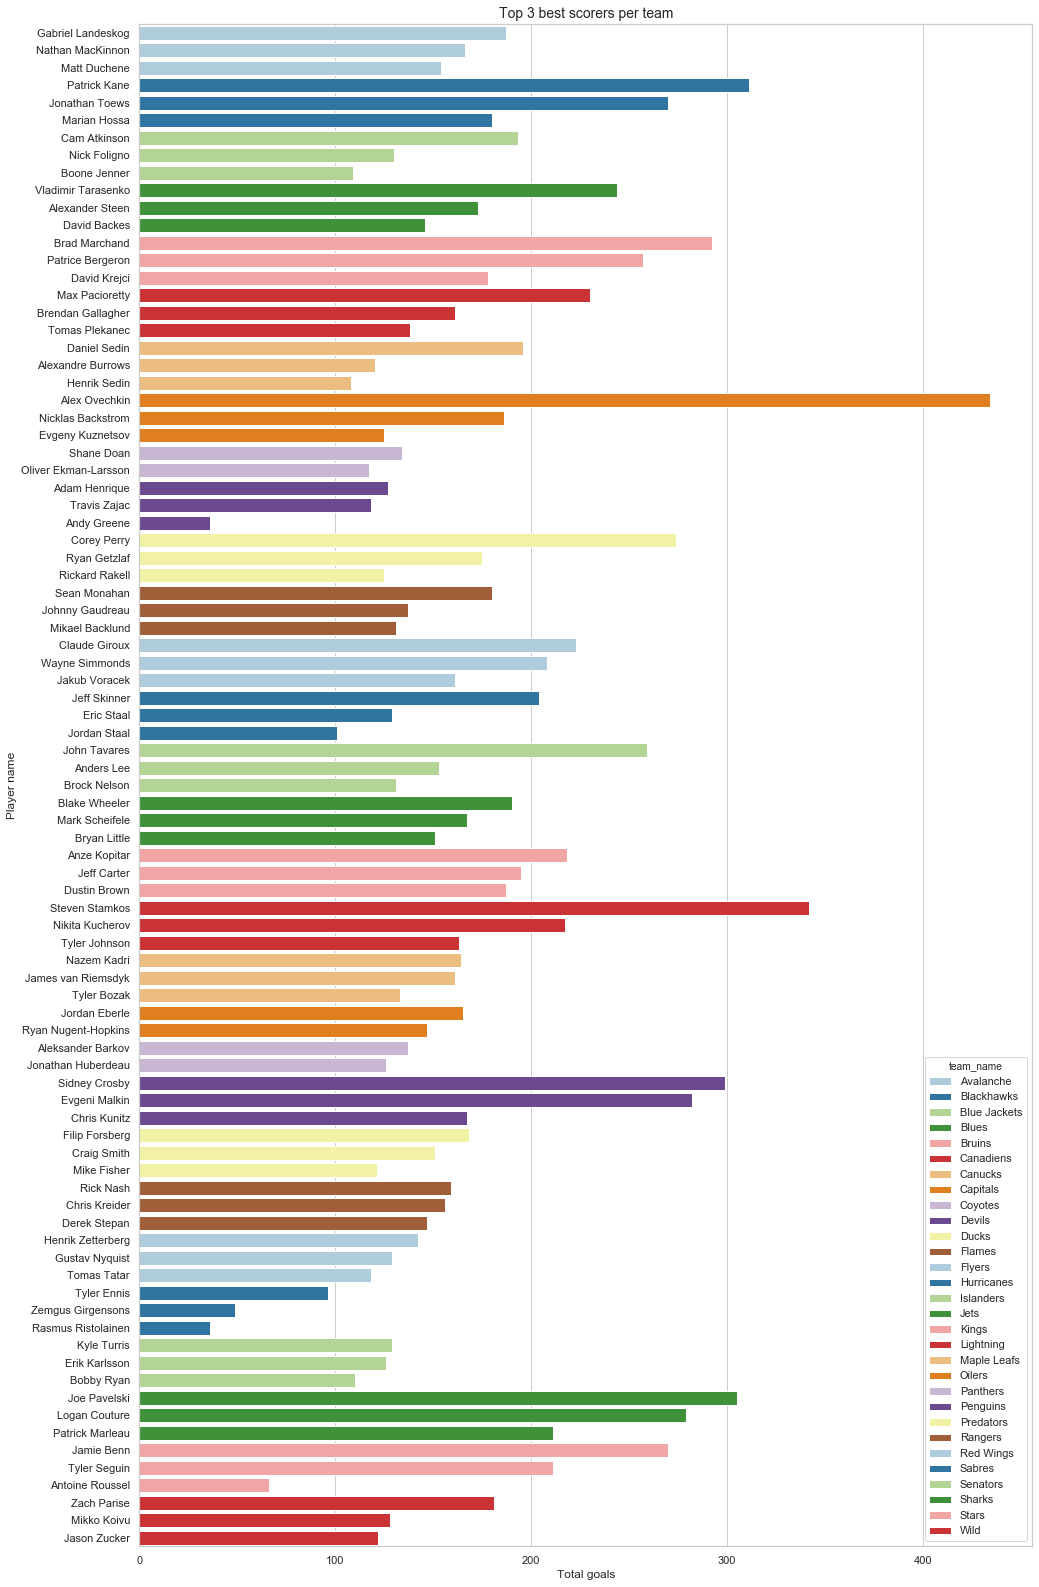

In [76]:
sns.set(rc={'figure.figsize':(16,28)})
sns.set(style="whitegrid")
sns.barplot(x='total_goals', y='player_name', hue='team_name', data=top_3_per_team, palette='Paired', dodge=False);
plt.xlabel('Total goals')
plt.ylabel('Player name')
plt.title('Top 3 best scorers per team', fontsize=14)
plt.show()

### Do home teams win more games?

In [93]:
game.head()

,game_id,season,type,date_time,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz
0,2011030221,20112012,P,2012-04-29,2012-04-29 19:00:00+00:00,1,4,3,4,home win OT,right,Wells Fargo Center,America/New_York,-4,EDT
1,2011030222,20112012,P,2012-05-01,2012-05-01 23:30:00+00:00,1,4,4,1,away win REG,right,Wells Fargo Center,America/New_York,-4,EDT
2,2011030223,20112012,P,2012-05-03,2012-05-03 23:30:00+00:00,4,1,3,4,home win OT,left,Prudential Center,America/New_York,-4,EDT
3,2011030224,20112012,P,2012-05-06,2012-05-06 23:30:00+00:00,4,1,2,4,home win REG,left,Prudential Center,America/New_York,-4,EDT
4,2011030225,20112012,P,2012-05-08,2012-05-08 23:30:00+00:00,1,4,3,1,away win REG,right,Wells Fargo Center,America/New_York,-4,EDT


In [104]:
game[game['outcome'].str.contains('REG')]['outcome'].value_counts(dropna=True)

home win REG    4857
away win REG    3881
Name: outcome, dtype: int64

In [110]:
pd.pivot_table(game, 'game_id', 'outcome', 'home_rink_side_start', aggfunc='count', margins=True, dropna=False)

home_rink_side_start,left,right,All
outcome,,,
away win OT,321,393,734
away win REG,1778,2010,3881
away win SO,249,323,591
home win OT,358,415,791
home win REG,2205,2523,4857
home win SO,271,294,580
All,5182,5958,11434


In [77]:
x = game[game['outcome'].str.contains('REG')]['outcome'].value_counts()

In [78]:
y = game[game['outcome'].str.contains('REG')]['outcome'].value_counts().index

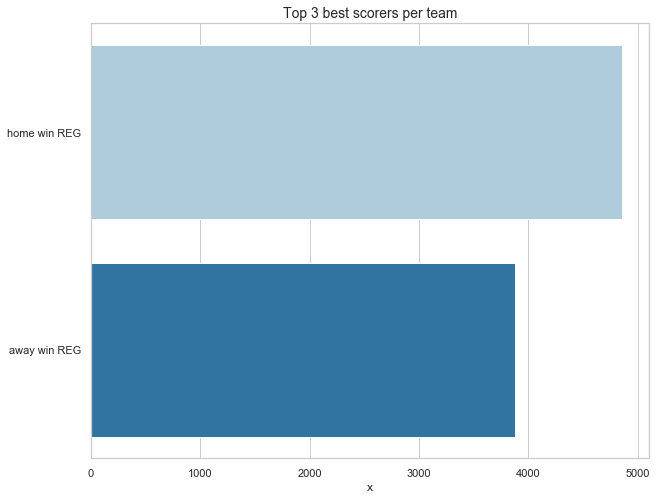

In [79]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set(style="whitegrid")
sns.barplot(x=x, y=y, palette='Paired', dodge=False);
plt.xlabel('x')
plt.title('Top 3 best scorers per team', fontsize=14)
plt.show()

In [80]:
game[game['outcome'].str.contains('OT')]['outcome'].value_counts()

home win OT    791
away win OT    734
Name: outcome, dtype: int64

In [81]:
game[game['outcome'].str.contains('SO')]['outcome'].value_counts()

away win SO    591
home win SO    580
Name: outcome, dtype: int64

In [82]:
4857+3881

8738

In [83]:
game[game['outcome'].str.contains('SO')]['outcome'].value_counts().index

Index(['away win SO', 'home win SO'], dtype='object')

In [84]:
game[game['outcome'].str.contains('SO')]['outcome'].value_counts().items

<bound method Series.items of away win SO    591
home win SO    580
Name: outcome, dtype: int64>

### What is the most prolific country producing NHL players?

In [85]:
players_per_country = player_info['nationality'].value_counts().to_frame().reset_index(drop=False)

In [86]:
players_per_country.columns = ['Country', 'Number_players']

In [87]:
players_per_country

,Country,Number_players
0,CAN,1149
1,USA,651
2,SWE,184
3,FIN,101
4,RUS,99
5,CZE,97
6,SVK,25
7,CHE,24
8,DEU,20
9,DNK,14


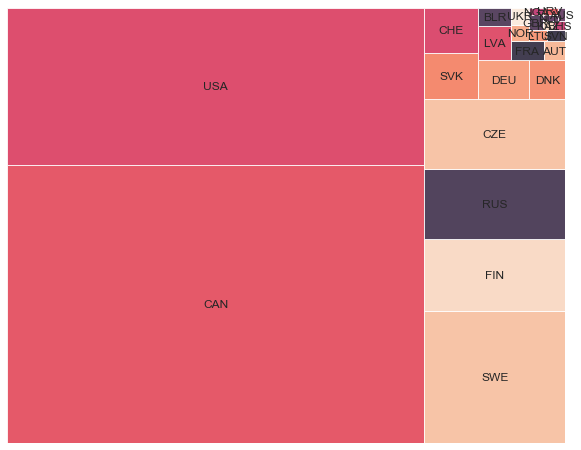

In [88]:
squarify.plot(sizes=players_per_country['Number_players'], label=players_per_country['Country'] , alpha=.8 )
plt.axis('off')
plt.show()

In [91]:
top_skaters.sort_values('gpg', ascending=False).head(20)[['team_name','player_name', 'nationality', 'position', 'games_played','gpg']]

,team_name,player_name,nationality,position,games_played,gpg
905,Capitals,Alex Ovechkin,RUS,LW,788,0.55
2224,Lightning,Steven Stamkos,CAN,C,655,0.52
2779,Penguins,Sidney Crosby,CAN,C,674,0.44
2713,Penguins,Evgeni Malkin,RUS,C,643,0.44
3620,Stars,Tyler Seguin,CAN,C,489,0.43
488,Blues,Vladimir Tarasenko,RUS,RW,567,0.43
1882,Islanders,John Tavares,CAN,C,611,0.42
2207,Lightning,Nikita Kucherov,RUS,RW,512,0.42
221,Blackhawks,Patrick Kane,USA,RW,748,0.42
705,Canadiens,Max Pacioretty,USA,LW,578,0.40


## Some plots I use to get an idea of the data

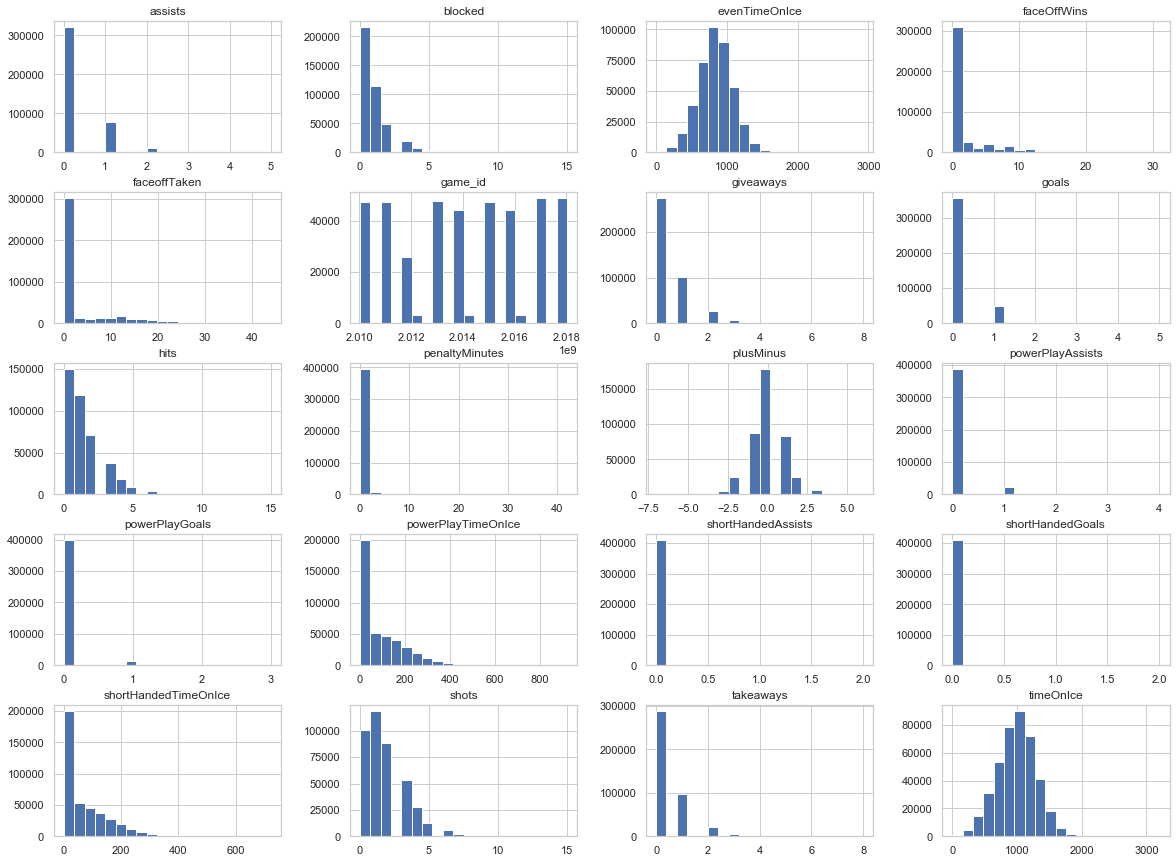

In [89]:
skater.hist(bins=20, figsize=(20, 15));